# Student Dropout Risk Prediction – Final Report

This notebook presents the final stage of our machine learning pipeline: 
**reporting and interpretation of results**.  
The goal of the project is to **predict dropout risk** among students based on 
attendance, test scores, discipline records, and parental involvement.  

We aim to provide actionable insights that can help educators identify at-risk 
students early and intervene effectively.


## Data & Preprocessing

The dataset went through several stages:
- **Raw Data** → cleaned for missing/invalid entries.
- **Exploratory Data Analysis (EDA)** → revealed patterns and correlations.
- **Feature Engineering** → scaling numeric variables, encoding categorical features.
- **Processed Data** → saved in `data/processed/student_features.csv`.

Below is the final shape of the dataset used for modeling.


In [1]:
import pandas as pd
df = pd.read_csv("../data/processed/student_features.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (600, 5)


,attendance_percent,test_score,discipline_count,parental_involvement,dropout_risk
0,0.628737,0.709644,1.364326,-0.815322,1
1,0.000000,-1.038932,-0.533500,1.342883,0
2,0.799525,0.826917,0.099109,-0.095920,0
3,1.763691,1.333044,1.364326,-0.815322,1
4,-0.198047,0.351887,1.364326,1.342883,1


## Key EDA Findings

From our analysis:
- **Attendance %**: Strongest negative correlation with dropout risk.
- **Discipline count**: Positively correlated with dropout risk.
- **Test score**: Weak predictor individually, but may contribute in combination.
- **Parental involvement**: Weak linear correlation, but conceptually important.

Let’s revisit the correlation heatmap and distributions.


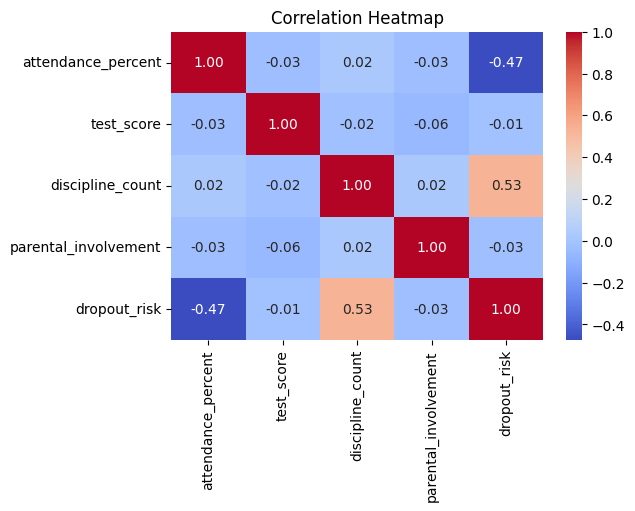

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Models Trained and Evaluated

We implemented both **baseline** and **complex models**:

- Logistic Regression (baseline, interpretable).
- Random Forest (ensemble method, handles non-linearities).
- Support Vector Machine (RBF kernel for non-linear classification).
- Gradient Boosting (ensemble with sequential improvements).
- XGBoost (optimized boosting, high performance).

Hyperparameter tuning was applied to each model using GridSearchCV.  


## Model Evaluation

The models were evaluated on:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**
- **ROC AUC**

We emphasize **recall** because failing to identify an at-risk student 
(false negatives) is more costly than a false alarm (false positive).


## Best Model Selection

From the evaluation results:
- **XGBoost** achieved the best balance between recall and overall accuracy.
- **Random Forest** was competitive but slightly less effective.
- **Logistic Regression** provided interpretability but lower recall.

We therefore recommend **XGBoost** as the primary model for predicting dropout risk.


## Conclusion & Recommendations

- **Findings**: Attendance and discipline count are the strongest predictors 
of dropout risk. Test scores and parental involvement add marginal value but 
are conceptually important.
- **Best Model**: XGBoost (tuned) offers the best predictive performance.
- **Use Case**: Schools can use this model to flag at-risk students early, 
allowing timely intervention such as counseling or academic support.

### Limitations
- Dataset may not capture all relevant social and economic factors.
- Data imbalance (if present) may bias predictions.

### Next Steps
- Incorporate additional features (socioeconomic, psychological factors).
- Explore explainable AI (SHAP values) for deeper interpretability.
- Deploy model as a school dashboard for real-time monitoring.
